In [38]:
import torch
import torch_scatter
import numpy as np
import matplotlib.pyplot as plt

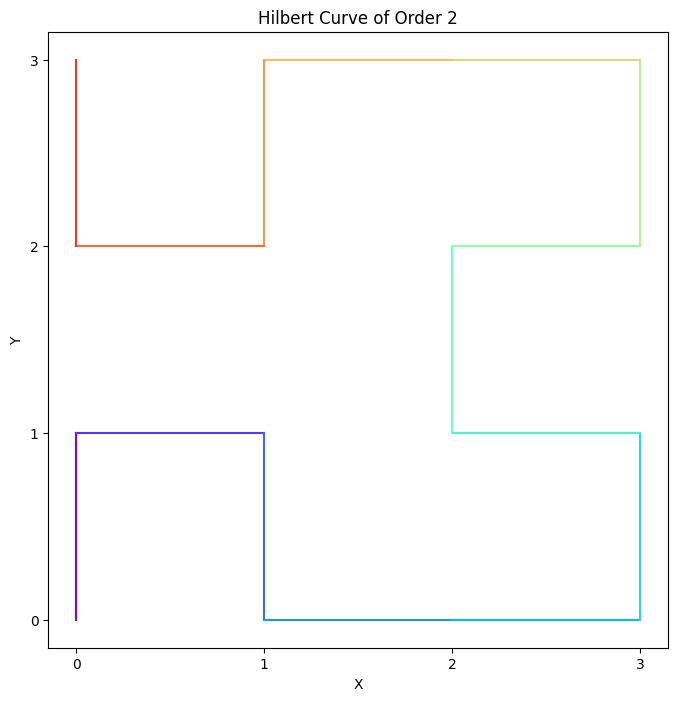

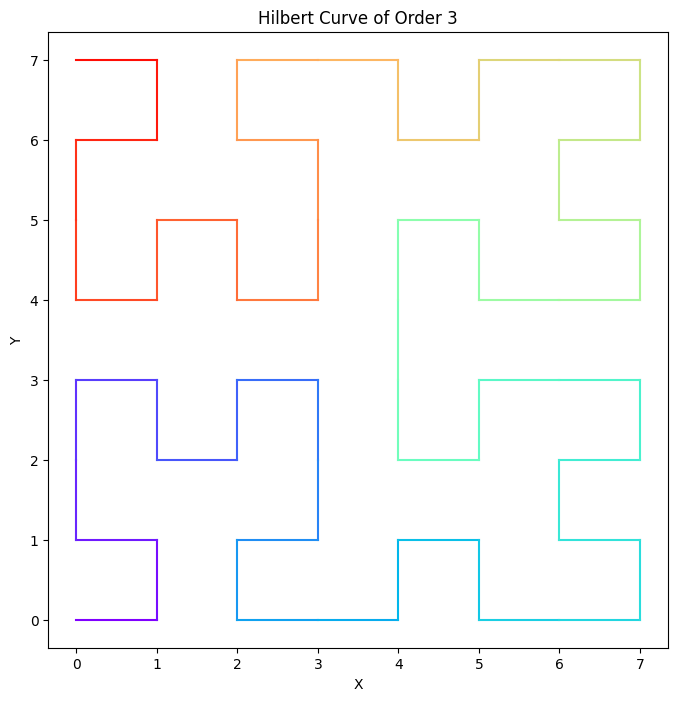

In [2]:
def plot_hilbert_curve(order):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_order_{order}.pth').cpu()
    # curve_tensor = rotate90(curve_tensor, order)
    dim = 1<<order
    # 提取坐标
    coords = np.array([[x, y] for x in range(dim) for y in range(dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    flat_coords = y * dim + x
    hil_inds = curve_tensor[flat_coords].long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    
    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))
    
    # 绘制Hilbert曲线
    plt.figure(figsize=(8, 8))
    for i in range(len(x_coords) - 1):
        plt.plot(x_coords[i:i+2], y_coords[i:i+2], color=colors[i])
    # plt.plot(x_coords, y_coords, marker='o')
    plt.title(f'Hilbert Curve of Order {order}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    # 设置刻度步长为1
    plt.xticks(range(min(x_coords), max(x_coords) + 1, 1))
    plt.yticks(range(min(y_coords), max(y_coords) + 1, 1))
    
    plt.show()
    
plot_hilbert_curve(2)
plot_hilbert_curve(3)

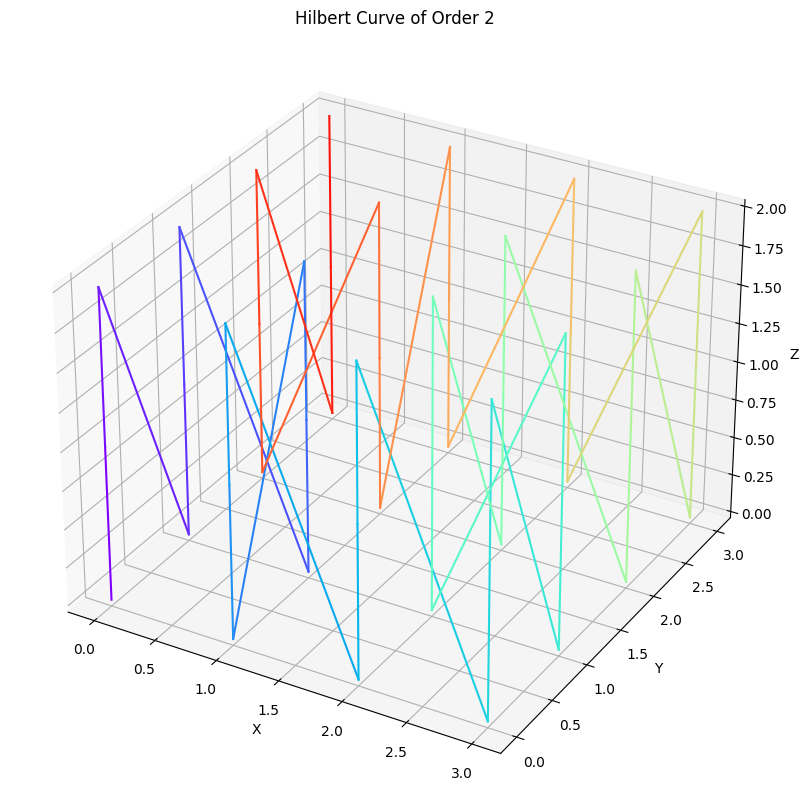

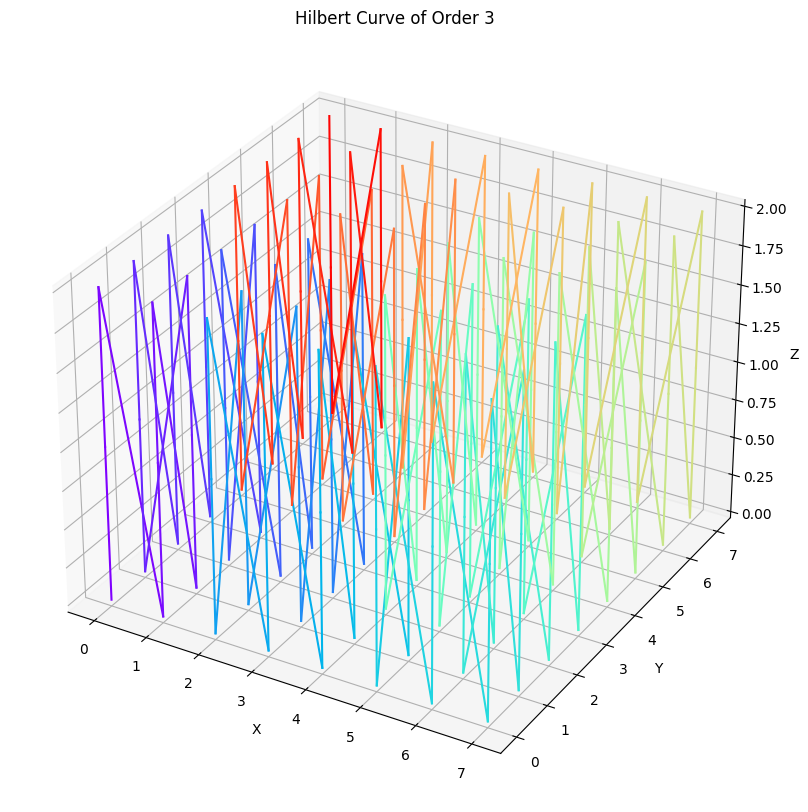

In [3]:
def plot_hilbert_curve_3d(order, z_dim = 3):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制三维路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_order_{order}.pth').cpu()
    # curve_tensor = rotate90(curve_tensor, order)
    dim = 2 ** order
    # 提取坐标
    coords = np.array([[x, y, z] for x in range(dim) for y in range(dim) for z in range(z_dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]
    flat_coords = y * dim + x
    hil_inds = (curve_tensor[flat_coords] * z_dim + z).long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    z_coords = z[inds_curt_to_next]

    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))

    # 绘制三维Hilbert曲线
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(x_coords) - 1):
        ax.plot(x_coords[i:i+2], y_coords[i:i+2], z_coords[i:i+2], color=colors[i])
    ax.set_title(f'Hilbert Curve of Order {order}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_hilbert_curve_3d(2)
plot_hilbert_curve_3d(3)

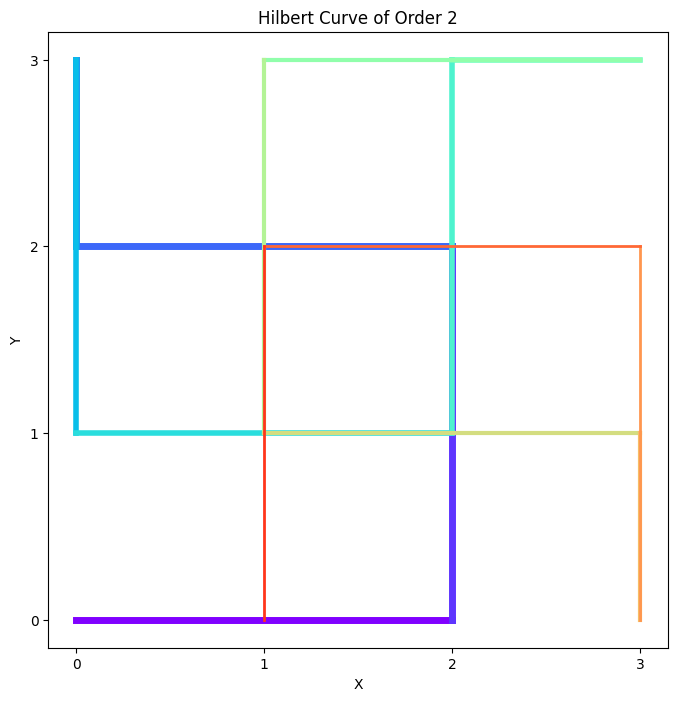

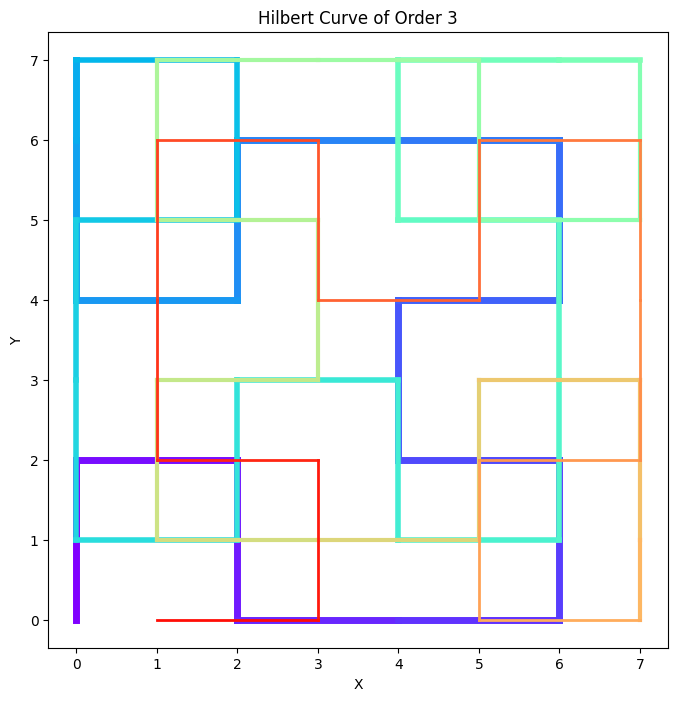

In [4]:
def plot_hilbert_curve_es(order):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_es_order_{order}.pth').cpu()
    s = 1<<(order-1)
    # curve_es = torch.cat([curve_tensor + i*s*s for i in range(4)], dim=0)
    
    # curve_tensor = rotate90(curve_tensor, order)
    # 提取坐标
    coords = np.array([[x, y] for x in range(2*s) for y in range(2*s)])
    x = coords[:, 0]
    y = coords[:, 1]
    
    flat_coords = ((y//2)*2*s+(x//2)) + (y%2)*s + (x%2)*2*s*s 
    # flat_coords = (1-y%2)*(1-x%2)*((y//2)*2*s+(x//2)) + \
    #               (y%2)*(1-x%2)*((y//2)*2*s+(x//2+s)) + \
    #               (1-y%2)*(x%2)*((y//2+s)*2*s+(x//2)) + \
    #               (y%2)*(x%2)*((y//2+s)*2*s+(x//2+s))
    hil_inds = curve_tensor[flat_coords].long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    
    # x_coords = x_coords[:4]
    # y_coords = y_coords[:4]
    
    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))
    linewidth = [5] * (len(x_coords) // 4) + [4] * (len(x_coords) // 4) + [3] * (len(x_coords) // 4) + [2] * (len(x_coords) - 3 * (len(x_coords) // 4))
    
    # 绘制Hilbert曲线
    plt.figure(figsize=(8, 8))
    for i in range(len(x_coords) - 1):
        plt.plot(x_coords[i:i+2], y_coords[i:i+2], color=colors[i], linewidth=linewidth[i])
    # plt.plot(x_coords, y_coords, marker='o')
    plt.title(f'Hilbert Curve of Order {order}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    # 设置刻度步长为1
    plt.xticks(range(min(x_coords), max(x_coords) + 1, 1))
    plt.yticks(range(min(y_coords), max(y_coords) + 1, 1))
    
    plt.show()
    
plot_hilbert_curve_es(2)
plot_hilbert_curve_es(3)

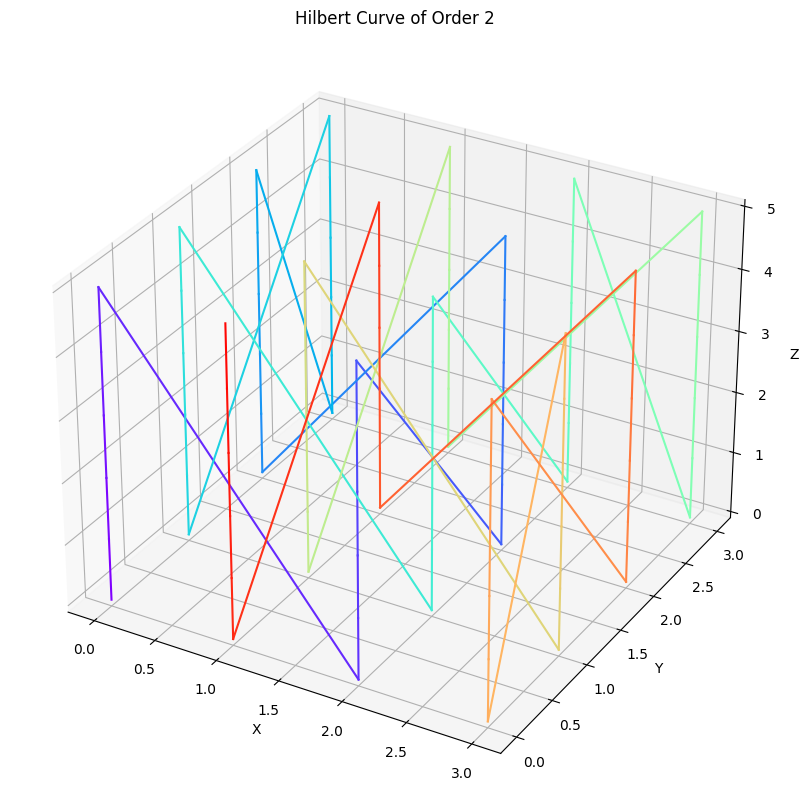

FileNotFoundError: [Errno 2] No such file or directory: '../../data/hilbert/hilbert_curve_es_order_3.pth'

In [11]:
def plot_hilbert_curve_es_3d(order, z_dim = 6):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_es_order_{order}.pth').cpu()
    s = 1<<(order-1)
    # curve_es = torch.cat([curve_tensor + i*s*s for i in range(4)], dim=0)
    
    # curve_tensor = rotate90(curve_tensor, order)
    # 提取坐标
    coords = np.array([[x, y, z] for x in range(2*s) for y in range(2*s) for z in range(z_dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]
    
    flat_coords = y * s  + (x // 2) + (x % 2) * 2 * s * s
    hil_inds = (curve_tensor[flat_coords] * z_dim + z).long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    z_coords = z[inds_curt_to_next]

    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))

    # 绘制三维Hilbert曲线
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(x_coords) - 1):
        ax.plot(x_coords[i:i+2], y_coords[i:i+2], z_coords[i:i+2], color=colors[i])
    ax.set_title(f'Hilbert Curve of Order {order}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
plot_hilbert_curve_es_3d(2)
plot_hilbert_curve_es_3d(3)

/tmp/ipykernel_1357904/1919666420.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  merge_coords = torch.tensor(merge_coords)


torch.Size([11])
tensor([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([30])
tensor([ 0,  0,  2,  2,  6,  7,  3,  3,  4,  3,  4,  0,  0,  1,  5,  8,  9,  3,
         4,  5,  6,  5,  6,  9, 10,  3,  0,  1,  2,  2])
torch.Size([11])
tensor([5, 2, 4, 5, 3, 3, 3, 1, 1, 2, 1])
tensor([[0.0073, 0.7739, 0.5868, 0.5683, 0.8326, 0.8842, 0.6418, 0.2954, 0.1271,
         0.8842, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1295, 0.5705, 0.0391, 0.2034, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9957, 0.9237, 0.1517, 0.6255, 0.9895, 0.6287, 0.0822, 0.4517, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0966, 0.5906, 0.2712, 0.7748, 0.5069, 0.4891, 0.6516, 0.1106, 0.4689,
         0.5977, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1240, 0.4013, 0.3244, 0.5523, 0.6089, 0.9831, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

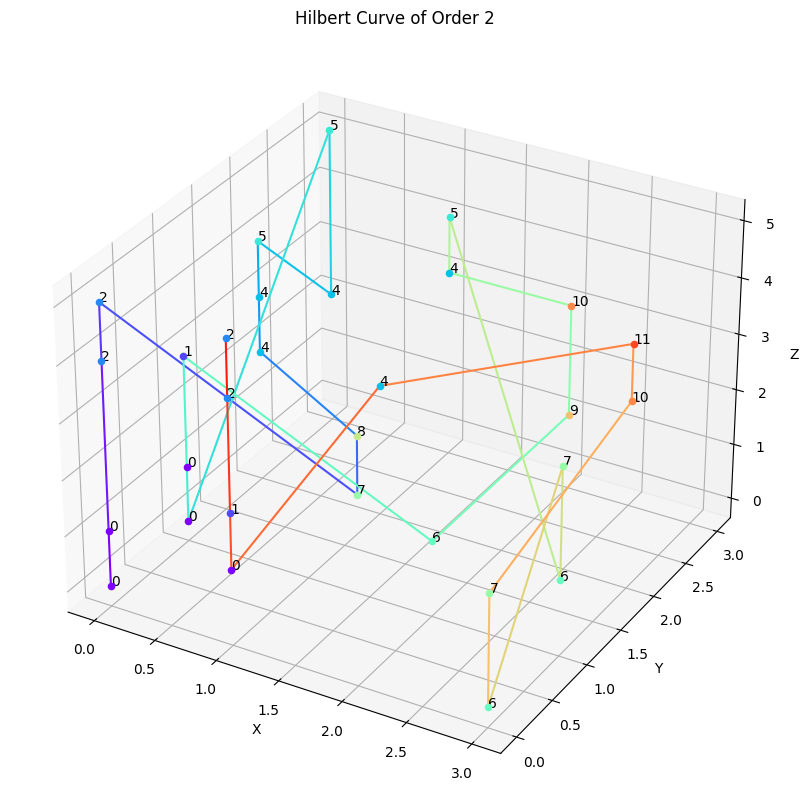

In [90]:
def plot_hilbert_curve_es_3d(order, z_dim = 6):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_es_order_{order}.pth').cpu()
    s = 1<<(order-1)
    # curve_es = torch.cat([curve_tensor + i*s*s for i in range(4)], dim=0)
    
    # curve_tensor = rotate90(curve_tensor, order)
    # 提取坐标
    coords = np.array([[x, y, z] for x in range(2*s) for y in range(2*s) for z in range(z_dim)])
    np.random.shuffle(coords)
    
    coords = coords[:30]
    feats = np.random.rand(coords.shape[0], 2)  
    coords = torch.tensor(coords)
    feats = torch.tensor(feats)

    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]
    
    flat_coords = y * s  + (x // 2) + (x % 2) * 2 * s * s
    hil_inds = (curve_tensor[flat_coords] * z_dim + z).long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    z_coords = z[inds_curt_to_next]


    
    x_down = x_coords // 2
    y_down = y_coords // 2
    z_down = z_coords // 2
    
    scale_yz = (z_dim // 2) * s
    scale_z = (z_dim // 2)
    
    merge_coords = x_down * scale_yz + y_down * scale_z + z_down
    merge_coords = torch.tensor(merge_coords)
    
    unq_coords, unq_inv, unq_cnt = torch.unique(merge_coords, return_inverse=True, return_counts=True, dim=0)

    print(unq_coords.shape)
    print(unq_coords)
    print(unq_inv.shape)
    print(unq_inv)
    print(unq_cnt.shape)
    print(unq_cnt)
    
    feats_flat = feats[inds_curt_to_next]
    feats_down = torch.zeros((unq_coords.shape[0], feats_flat.shape[1]*8), dtype=feats_flat.dtype)
    for i in range(len(unq_coords)):
        feats_down[i, :feats_flat.shape[1]*unq_cnt[i]] = feats_flat[unq_inv == i].view(-1)
    feats_down_scatter = torch_scatter.scatter(feats_flat, unq_inv, dim=0, reduce='sum')
    
    print(feats_down)
    print(feats_down_scatter)
    

    # 生成颜色映射
    colors_line = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))
    colors_dot = plt.cm.rainbow(np.linspace(0, 1, max(unq_coords)+1))

    # 绘制三维Hilbert曲线
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(x_coords) - 1):
        ax.plot(x_coords[i:i+2], y_coords[i:i+2], z_coords[i:i+2], color=colors_line[i])
    for i in range(len(x_coords)):
        ax.scatter(x_coords[i], y_coords[i], z_coords[i], color=colors_dot[unq_inv[i]], s=20)
        ax.text(x_coords[i], y_coords[i], z_coords[i], f'{unq_coords[unq_inv[i]]}', color='black')
    ax.set_title(f'Hilbert Curve of Order {order}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
plot_hilbert_curve_es_3d(2)